# PremierPredict : *Rendre possible la prédiction des matchs de football*

## Mise en contexte

Le football est bien plus qu'un simple sport - c'est un phénomène mondial qui suscite passion et débats constants. Au cœur de ces discussions se trouve souvent une question fondamentale que nous considérons comme étant *la* question au centre de notre projet : 

> #### Est-il possible de **prédire les résultats** des matchs de football futurs selon des données historiques?

Notre projet **PremierPredict** explore cette question en *développant un modèle prédictif pour les matchs de la Premier League anglaise*. Au-delà de la simple curiosité sportive, cette démarche s'inscrit dans une application concrète de l'analyse de données et de l'apprentissage automatique.
La Premier League, avec son niveau de compétition élevé et ses données abondantes, constitue un terrain d'étude idéal. Pour mener à bien notre projet, notre objectif se décrit en deux autres questions additionnelles :


> ##### 1. Quels **facteurs** influencent réellement le résultat d'un match de football?

> ##### 2. Selon les facteurs relevés, est-il possible de créer un **modèle capable de prédire les résultats futurs** avec une précision supérieure au hasard?


En combinant notre **analyse** avec des **modèles d'apprentissage automatique**, nous avons ainsi tenter de capturer les subtilités du jeu et de transformer des statistiques brutes en prédictions fiables, offrant ainsi un nouvel éclairage sur ce sport universel.

Nous avons déployé le modèle prédictif que nous avons conçu au terme du projet sous la forme d'une application web, pour permettre de prédire les résultats de différents matchs! 

#### L'application est disponible au lien suivant. **Essayez-là ! : [PremierPredict](https://foot-forecast.streamlit.app)**

# Question 1 : Quels facteurs influencent réellement le résultat d'un match de football?

Dans cette section, nous explorons les variables qui exercent une influence significative sur l'issue des rencontres en Premier League. Au-delà des intuitions communes, nous cherchons à quantifier précisément l'impact de différents facteurs sur la probabilité de victoire d'une équipe.


## Import de librairies et des données

La librairie `pandas` sera utilisée pour l'analyse et la manipulation de données

In [1]:
import pandas as pd

Import du `.csv` des données de match sous la forme d'un en tant que *data frame* 

In [2]:
matchs = pd.read_csv('epl_2000-2025.csv')

## Nettoyer les données

### Renommer les noms de variables et valeurs

En analysant la taille des données, on remarque $22$ variables différentes et $9318$ observations totales

Les significations des noms de variables sont explicités dans le fichier `column_def.txt`, il sera important de les modifier au sein du dataframe pour faciliter la compréhension

In [3]:
print(matchs.shape)
print(matchs.columns)

(9318, 22)
Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR'],
      dtype='object')


Les noms des variables sont changés à l'aide de la fonction `.rename` et l'argument `inplace=True` pour modifier le *data frame* existant

In [4]:
matchs.rename(columns={'Season':'Saison',
                        'HomeTeam':'Domicile',
                        'AwayTeam':'Exterieur',
                        'FTR':'Resultat',
                        'HTR':'Resultat (mi-temps)',
                        'FTHG':'Buts domicile', 
                        'FTAG':'Buts exterieur',
                        'HTHG':'But domicile (mi-temps)',
                        'HTAG':'But exterieur (mi-temps)',
                        'HS':'Tirs domicile',
                        'AS':'Tirs exterieur',
                        'HST':'Tirs cadres domicile',
                        'HST':'Tirs cadres domicile',
                        'AST':'Tirs cadres exterieur',
                        'HF':'Fautes domicile',
                        'AF':'Fautes exterieur',
                        'HC':'Corners domicile',
                        'AC':'Corners exterieur',
                        'HY':'Cartons jaunes domicile',
                        'AY':'Cartons jaunes exterieur',
                        'HR':'Cartons rouges domicile',
                        'AR':'Cartons rouges exterieur'
                        }, inplace=True)

In [5]:
matchs.columns

Index(['Date', 'Saison', 'Domicile', 'Exterieur', 'Buts domicile',
       'Buts exterieur', 'Resultat', 'But domicile (mi-temps)',
       'But exterieur (mi-temps)', 'Resultat (mi-temps)', 'Tirs domicile',
       'Tirs exterieur', 'Tirs cadres domicile', 'Tirs cadres exterieur',
       'Fautes domicile', 'Fautes exterieur', 'Corners domicile',
       'Corners exterieur', 'Cartons jaunes domicile',
       'Cartons jaunes exterieur', 'Cartons rouges domicile',
       'Cartons rouges exterieur'],
      dtype='object')

Une fois les noms de colonnes modifiés, on peut maintenant mieux visualiser les données au sein du *data frame* en appellant la méthode `df.head()`

In [6]:
matchs.head()

,Date,Saison,Domicile,Exterieur,Buts domicile,Buts exterieur,Resultat,But domicile (mi-temps),But exterieur (mi-temps),Resultat (mi-temps),...,Tirs cadres domicile,Tirs cadres exterieur,Fautes domicile,Fautes exterieur,Corners domicile,Corners exterieur,Cartons jaunes domicile,Cartons jaunes exterieur,Cartons rouges domicile,Cartons rouges exterieur
0,19/08/00,2000-2001,Charlton,Man City,4,0,H,2,0,H,...,14,4,13,12,6,6,1,2,0,0
1,19/08/00,2000-2001,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,19,14,7,7,1,2,0,0
2,19/08/00,2000-2001,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,15,21,8,4,5,3,1,0
3,19/08/00,2000-2001,Derby,Southampton,2,2,D,1,2,A,...,4,6,11,13,5,8,1,1,0,0
4,19/08/00,2000-2001,Leeds,Everton,2,0,H,2,0,H,...,8,6,21,20,6,4,1,3,0,0


On peut remplacer les données des colonnes `Resultat` et `Resultat (mi-temps)` par des noms plus explicites dans le buts de faciliter l'analyse à l'aide de la méthode `df.map()`

In [7]:
map_resultat = {'H':'Victoire domicile', 'D':'Match nul', 'A':'Victoire exterieur'}
matchs['Resultat'] = matchs['Resultat'].map(map_resultat)
matchs['Resultat (mi-temps)'] = matchs['Resultat (mi-temps)'].map(map_resultat)

In [8]:
print(matchs['Resultat'])

0        Victoire domicile
1        Victoire domicile
2       Victoire exterieur
3                Match nul
4        Victoire domicile
               ...        
9313    Victoire exterieur
9314    Victoire exterieur
9315     Victoire domicile
9316     Victoire domicile
9317    Victoire exterieur
Name: Resultat, Length: 9318, dtype: object


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Question 2 : Selon les facteurs identifiés, est-il possible de créer un modèle capable de prédire les résultats futurs avec une précision supérieure au hasard?

Notre second objectif se base sur cette analyse initiale en prenant et utilise les principaux facteurs relevés dans le but de pouvoir prédire les résultats des matchs futurs. Nous voulons au terme de cet étapes non seulement créer un modèle qui performe mieux que le hasard mais également faire en sorte que celui-ci puisse être utilisé. Ce second objectif se traduit en trois étapes clés : 

**1.** Le *feature engineering* des variables explicatives : constitue *l'étape la plus cruciale de ce second objectif* et repose sur **la création de variables tirées du jeu de données initiales pour aider le modèle à prédire** la variable cible. Par exemple créer une variable identifiant pour chaque match le nombre de victoires de chacune des deux équipes au courant de leurs 5 derniers matchs respectifs. 

**2.** La création du modèle prédictif : nous utiliserons à cette la librairie *Scikit-Learn* pour accèder à différents algorithmes prédictifs, pour entraîner, tester et évaluer les performances de notre modèle

**3.** Premettre l'utilisation du modèle : comme dernière étape, nous allons écrire une fonction permettant d'utiliser le modèle entraîné pour permettre de **réellement prédire le résultats des matchs futurs**

## Création de variables explicatives à travers le *feature engineering* 

Dans cette section, nous transformons nos données brutes en indicateurs pertinents pour la prédiction des matchs de football. Cette étape est cruciale car la qualité du modèle dépend directement de la pertinence des variables utilisées.

Notre approche s'articule autour de trois axes principaux :

- Représentation de la **forme récente** : Nous calculons un score de "forme" pour chaque équipe basé sur leurs 5 derniers matchs, reflétant leur dynamique actuelle.

- Statistiques **offensives et défensives** : Nous créons des indicateurs de performance offensive (buts marqués) et défensive (buts encaissés) à domicile et à l'extérieur, permettant de capturer les forces et faiblesses spécifiques de chaque équipe selon le contexte de jeu.
- Historique des confrontations directes : Nous intégrons l'historique des face-à-face entre les équipes, un facteur souvent déterminant dans l'issue d'une rencontre.

Ces nouvelles variables enrichissent considérablement notre jeu de données initial et permettent au modèle d'apprentissage de saisir des tendances complexes qui ne seraient pas visibles avec les statistiques brutes de matchs individuels.

Pour que nos données puissent être passées à travers différents algorithmes dans le but de prédire les résultats futurs, on doit s'assurer que le type des variables concernées soit des `float`, `int` ou des variables catégorielles

En appellant `pd.info()` on peut voir que la première colonne à modifier serait `Date` pour la mettre en format `datetime` en appellant `pd.to_datetime()`. Cette variable pourra être par la suite transformée en `int` en considérant par exemple la semaine où le match a eu lieu depuis le début de la saison

In [10]:
print(matchs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9318 entries, 0 to 9317
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      9318 non-null   object
 1   Saison                    9318 non-null   object
 2   Domicile                  9318 non-null   object
 3   Exterieur                 9318 non-null   object
 4   Buts domicile             9318 non-null   int64 
 5   Buts exterieur            9318 non-null   int64 
 6   Resultat                  9318 non-null   object
 7   But domicile (mi-temps)   9318 non-null   int64 
 8   But exterieur (mi-temps)  9318 non-null   int64 
 9   Resultat (mi-temps)       9318 non-null   object
 10  Tirs domicile             9318 non-null   int64 
 11  Tirs exterieur            9318 non-null   int64 
 12  Tirs cadres domicile      9318 non-null   int64 
 13  Tirs cadres exterieur     9318 non-null   int64 
 14  Fautes domicile         

#### Transformer le format des dates

En apellant `pd.to_datetime()` on obtient une erreur en raison des de certaines lignes (ex.$205$ à $759$) qui sont formattées de la manière `%Y-%m-%d` au lieu de `%d/%m/%Y` tel qu'accepté par la méthode

Nous devons regarder de plus près pour voir ce qui cause l'erreur et pouvoir y remédier

In [11]:
print(matchs['Date'][204:761])

204      30/12/00
205    2001-01-01
206    2001-01-01
207    2001-01-01
208    2001-01-01
          ...    
756    2011-05-02
757    2011-05-02
758    2011-05-02
759    2011-05-02
760    17/08/2002
Name: Date, Length: 557, dtype: object


##### Rectifier les dates erronnées

En analysant les résultats obtenus, on s'apperçoit que de nombreuses dates ont été enregistrées de manière erronnée ce qui fausse l'information au sein du *data frame*

En recherchant en ligne les résultat du match correspondant à l'entrée $2013-08-16$ opposant les équipes `Burnley` et `Swansea` $(0-1)$, on s'apperçoit qu'il a réellement eu lieu à la date $13/08/2016$

C'est le même cas pour les entrées suivantes: par exemple lors du cas du match correspondant à l'entrée $2021-05-17$ opposant les équipes `Watford` et `Man City` $(5-1)$, qui a réellement eu lieu à la date $21/05/2017$

 - Cas 1 : On doit donc créer un script afin de pouvoir modifier ces rangées pour les transformer par la suite, celui-ci devra inverser les chiffres représentant les années avec ceux représentant les jours et remplacer les `-` avec des `/`.

 - Cas 2 : Un deuxième problème survient dans les données plus anciennes où les années sont écrites avec seulement deux chiffres au lieu de 4 par exemple $19/08/00$ pour représenter $19/08/2000$, cette différence devra aussi être adressée

In [12]:
# on itère à travers une liste de la longueur des rangées contenant des dates fautives
for i in range(len(matchs)):                                     
    # on spécifie qu'on itère à travers la colonne Date du data frame
    row = matchs['Date'][i]                                   
    # on identifie les dates erronnées pour le cas 1 (elles utilisent le séparateur '-')
    if row[4:5] == '-':
        # on extrait les valeurs de l'année qui représenteront les jours ex: (20XX-05-17) -> (XX/05/2017)
        jour = row[2:4]                                           
        # on extrait les valeurs du mois qui resteront les mêmes ex: (2021-XX-17) -> (21/XX/2017)
        mois = row[5:7]                                           
        # on extrait les valeurs des jours qui deviendront les dernières valeurs des années ex: (2021-05-XX) -> (21/05/20XX)
        annee = row[-2:]                                          
        # on combine maintenant les valeurs relevés en remplaçant les - avec des / pour correspondre au format datetime et on les remplace au sein de la colonne
        matchs.loc[i, 'Date'] = f'{jour}/{mois}/20{annee}'
    # on répète le même processus pour le cas d'erreur 2 (le séparateur '/' apparaît deux positions à partir de la fin)
    elif row[-3:-2] == '/':
        date = row[:-3]                                           
        annee = row[-2:]                                          
        matchs.loc[i, 'Date'] = f'{date}/20{annee}'      

In [13]:
print(matchs['Date'][380:760])

380    18/08/2001
381    18/08/2001
382    18/08/2001
383    18/08/2001
384    18/08/2001
          ...    
755    11/05/2002
756    11/05/2002
757    11/05/2002
758    11/05/2002
759    11/05/2002
Name: Date, Length: 380, dtype: object


In [14]:
print(matchs['Date'][0:206])

0      19/08/2000
1      19/08/2000
2      19/08/2000
3      19/08/2000
4      19/08/2000
          ...    
201    30/12/2000
202    30/12/2000
203    30/12/2000
204    30/12/2000
205    01/01/2001
Name: Date, Length: 206, dtype: object


On observe donc que les dates sont maintenant correctes et peuvent donc être converties avec `pd.to_datetime()` en précisant l'argument `dayfirst=True`

In [15]:
matchs['Date'] = pd.to_datetime(matchs['Date'], dayfirst=True)

Avec les dates, on peut maintenant créer d'autres variables représentant les jours et les mois de la semaine, pour évaluer si certaines équipes jouent mieux ou moins bien durant certaines jours ou certains mois de l'année

In [16]:
matchs['JoursSemaine'] = matchs['Date'].dt.day_of_week
matchs['Mois'] = matchs['Date'].dt.month

#### Représenter les saisons

Pour ce qui en est de la variable saison on peut choisir de la transformer en `int` en considérant l'année de début de chaque saison. 
Par exemple, la saison $2015-2016$ deviendra $2015$, $2016-2017$ deviendra $2016$ et ainsi de suite

Pour ce faire, on `str.split` avec `-` et on convertit la colonne en type `int`

In [17]:
matchs['AnneeSaison'] = matchs['Saison'].str.split('-').str[0].astype(int)

À partir de cette nouvelle variable, on peut maintenant créer la variable `SemaineSaison` visant à déterminer la semaine de la saison à laquelle le match a eu lieu, certaines équipes performant mieux au début, au milieu ou à la fin de la saison

Pour ce faire, on associe dans `JoursSaison` le nombre de jours depuis le début de la saison $(5$ $août)$ et on divise par la suite cette colonne par $7$ pour obtenir la semaine de la saison durant laquelle l'équipe a joué. On ajoute par la suite $1$ comme dans le sport les semaines de saison sont typiquement comptées à partir de $1$

In [18]:
# fonction anonyme calculant le nombre de jours écoulés depuis le 5 août pour chaque saison
# Pour chaque ligne du dataframe, on calcule la différence entre la date du match (x['Date']) et le 5 août de l'année correspondant à la saison (x['AnneeSaison'])
# on spécifie axis=1 pour s'assurer d'appliquer le calcul sur les lignes du dataframe et l'attribut days convertit cette différence en nombre de jours
matchs['JoursSaison'] = matchs.apply(lambda x: (x['Date'] - pd.Timestamp(year=x['AnneeSaison'], month=8, day=5)).days, axis=1)      
# on divise par 7 pour obtenir le nombre de semaines et on utilise le floor division pour obtenir un nombre entier de semaines
# on ajoute 1 ici pour faire commencer la fonction à la semaine 1 comme sont typiquement affichés les matchs
matchs['SemaineSaison'] = matchs['JoursSaison'] // 7 + 1                                                                            

#### Représenter la valeur cible du modèle

Les colonnes `Resultat` et `Resultat (mi-temps)` peuvent être réassignés dans une colonne catégorielle pour représenter $1$ dans le cas d'une victoire à domicile, $0$ dans le cas d'une victoire à l'extérieur et $2$ dans le cas d'un match nul. On utilise donc `df.map` une nouvelle fois pour réassigner ces valeurs. La valeur cible de notre modèle sera donc représentée par la colonne `Cible`, indiquant si l'équipe à domicile a gagné ou perdu. **C'est la valeur que l'on cherchera à prédire à l'aide du reste des variables**

In [19]:
map_resultat_cat = {'Victoire exterieur':'0', 'Victoire domicile':'1', 'Match nul':'2'}
matchs['Cible'] = (matchs['Resultat'].map(map_resultat_cat)).astype('int')

#### Représenter les équipes

Les valeurs des équipes dans le *data frame* sont présentement des strings et ne peuvent pas être considérées comme des intrants au modèle. Il est nécessaire de les encoder en utilisant un code numérique à l'aide de la méthode `.cat.codes` de pandas. Par le fait même, on doit également s'assurer que le même code soit utilisé par les équipes domicile et celles à l'extérieur

Le code sera déterminé par odre alpabétique, *Arsenal* se verra donc associéee au code $0$, *Aston Villa* au code $1$ et ainsi de suite

On crée premièrement un nouveau *data frame* contenant les valeurs uniques des équipes

In [20]:
# on combine dans une liste les deux colonnes des équipes en conservant les valeurs uniques pour éviter le dédoublement
equipes = pd.concat([matchs['Domicile'], matchs['Exterieur']]).unique()             
# transformer la liste en data frame
equipes_df = pd.DataFrame({'Equipe':equipes})                                       

On associe par la suite un code numérique à chacune des équipes

In [21]:
# on convertit en catégorie et on utilise cat.codes pour associer un code numérique à chaque équipe
equipes_df['CodeEquipe'] = equipes_df['Equipe'].astype('category').cat.codes            
# on crée un dictionnaire pour pouvoir mapper les noms d'équipe aux différents codes
code_equipe = dict(zip(equipes_df['Equipe'], equipes_df['CodeEquipe']))                 

# avec map on peut maintenant associer un code à chaque équipe du data frame original
matchs['DomicileCode'] = matchs['Domicile'].map(code_equipe)                            
matchs['ExterieurCode'] = matchs['Exterieur'].map(code_equipe)

Avant de poursuivre à la création de prochaines variables, on soutire du *data frame* les colonnes qui ne seront pas utilisées pour la modélisation afin d'alléger les données et diminuer le temps de calcul. On utilise pour ce faire la méthode `.drop` en spécifiant les colonnes à enlever

In [22]:
matchs.drop(columns=[
    'Domicile', 'Exterieur', 'But domicile (mi-temps)', 
    'But exterieur (mi-temps)', 'Resultat (mi-temps)', 'Tirs domicile',
    'Tirs domicile', 'Tirs exterieur', 'Tirs cadres domicile', 
    'Tirs cadres exterieur', 'Fautes domicile', 'Fautes exterieur',
    'Corners domicile', 'Corners exterieur', 'Cartons jaunes domicile',
    'Cartons jaunes exterieur', 'Cartons rouges domicile', 'Cartons rouges exterieur'
    ], inplace=True)

Les colonnes résultantes seront celles utilisées pour la suite du modèle

In [23]:
matchs.columns

Index(['Date', 'Saison', 'Buts domicile', 'Buts exterieur', 'Resultat',
       'JoursSemaine', 'Mois', 'AnneeSaison', 'JoursSaison', 'SemaineSaison',
       'Cible', 'DomicileCode', 'ExterieurCode'],
      dtype='object')

#### Représenter les performances des équipes

Il faut maintenant une manière de pouvoir évaluer la performance récente des équipes ou leur forme car il s'agit souvent d'un bon estimateur de ses résultats suivants. Une équipe venant de gagner plusieurs matchs consécutifs et qui est donc en bonne forme a généralement plus de confiance et cohésion et les points accumullés dans les matchs récents reflètent également les ajustements tactiques, le conditionnement des joueurs, leur moral et l'élan ainsi que les stratégies de l'équipe

On créera donc une fonction qui consulte les 5 matchs les plus récents pour chaque équipe et attribue $3$ points pour une victoire, $1$ point pour un match nul et $0$ pour une défaite

On calculera également les statistiques de buts des équipes depuis le début de la saison sous la forme d'une moyenne qui mesurerait la moyenne de buts marqués et encaissés par match. Ces métriques nous permettront par la suite d'établir des différentiels qui déduisent le nombre de buts encaissés du nombre de buts marqués dans le but d'essayer d'en déduire la performance future des équipes

L'ensemble de ces statistiques seront représentées dans la fonction `stats_equipe` qui pourra être par la suite appliquée à l'ensemble du *data frame* 

In [24]:
def stats_equipe(matchs):                      
    # on trie les données par date
    matchs = matchs.sort_values('Date')              
    
    # on initialise à 0 les deux colonnes ou seront stockés les points de forme
    matchs['DomicileForme'] = 0                         
    matchs['ExterieurForme'] = 0

    # on crée les colonnes où seront stockées les statistiques de but
    colonnes_buts = [
    'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home',     
    'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away',
    'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home',
    'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away']

    # on initialise à 0 les colonnes où seront stockées les statistiques de but en itérant à travers
    for col in colonnes_buts:
        matchs[col] = 0.0

    
    for i in range(len(matchs)):                         # on itère à travers chacun des matchs du dataframe 
        # on doit en premier lieu pour chacune des lignes du data frame, prendre les informations de la ligne (du match actuel) pour pouvoir calculer les statistiques en fonction des matchs ayant eu lieu avant celui-ci
        # par exemple supposons que le match actuel oppose Arsenal (code 0) et Aston Villa (code 1) et a eu lieu le 1er décembre 2024:
        match_actuel = matchs.iloc[i]                    # on stocke les information du match actuel dans la variable match_actuel en incluant les équipes qui jouent, la date et la saison
        equipe_domicile = match_actuel['DomicileCode']   # dans l'exemple, ici sera stocké 0 (code Arsenal) 
        equipe_exterieur = match_actuel['ExterieurCode'] # dans l'exemple, ici sera stocké 1 (code Aston Villa)
        date_match = match_actuel['Date']                # dans l'exemple, ici sera stocké la date du 1er décembre 2024
        saison_match = match_actuel['AnneeSaison']       # et ici serait stocké la saison du match dans ce cas-ci la saison 2024

        # on cherche maintenant les 5 derniers matchs où l'équipe a joué. on commence par l'équipe à domicile
        # dans l'exemple, on chercherait donc à savoir les matchs avant le 1er décembre où Arsenal a joué soit à l'extérieur ou a domicile, on les trie par la suite en ordre décroissant et on conserve les 5 derniers
        prec_domicile_5 = matchs[(matchs['Date'] < date_match) &
                               ((matchs['DomicileCode'] == equipe_domicile) | (matchs['ExterieurCode'] == equipe_domicile))]
        prec_domicile_5 = prec_domicile_5.sort_values('Date', ascending=False).head(5)
        
        # on fait le même processus pour l'équipe à l'extérieur en cherchant les 5 derniers matchs où elle a joué 
        # dans l'exemple on chercherait donc à savoir les matchs où Aston Villa a joué soit à l'extérieur ou à domicile en conservant les 5 derniers
        prec_exterieur_5 = matchs[(matchs['Date'] < date_match) & 
                                ((matchs['DomicileCode'] == equipe_exterieur) | (matchs['ExterieurCode'] == equipe_exterieur))]
        prec_exterieur_5 = prec_exterieur_5.sort_values('Date', ascending=False).head(5)

        # afin de pouvoir calculer les statistiques de but, on cherche maintenant à connaître les performance d'Arsenal et de Aston Villa pour l'entièreté de la saison actuelle
        # dans l'exmeple, on cherche donc les matchs ayant eu lieu avant le 1er décembre et durant la saison 2024 où Arsenal a joué à domicile ou à l'extérieur
        prec_domicile_saison = matchs[(matchs['Date'] < date_match) & (matchs['AnneeSaison'] == saison_match) &
                               ((matchs['DomicileCode'] == equipe_domicile) | (matchs['ExterieurCode'] == equipe_domicile))]
        
        # on fait le même processus pour l'équipe à l'extérieur
        # dans l'exemple on chercherait les matchs joués avant le 1er décembre durant la saison 2024 où Aston Villa a joué
        prec_exterieur_saison = matchs[(matchs['Date'] < date_match) & (matchs['AnneeSaison'] == saison_match) & 
                                ((matchs['DomicileCode'] == equipe_exterieur) | (matchs['ExterieurCode'] == equipe_exterieur))]

        # calcul des points de forme pour l'équipe à domicile
        # on initialise la variable qui comptera le nombre de points récoltés à domicile
        points_domicile = 0
        for j in range(len(prec_domicile_5)):             # on itère à travers les matchs précédents qui ont été trouvés et stockés dans prec_domicile_5
            match_prec = prec_domicile_5.iloc[j]          # on stocke les informations de chaque itération du match précédant dans la variable match_prec
            # on itére à travers les 5 derniers matchs et on ajoute 3 points pour chaque victoire à domicile ou à l'extérieur et 1 point par match nul
            # dans l'exemple, si Arsenal a gagné 3 matchs parmi ses 5 derniers, l'équipe se vera attribuer 3 points
            if match_prec['DomicileCode'] == equipe_domicile and match_prec['Cible'] == 1:
                points_domicile += 3
            elif match_prec['ExterieurCode'] == equipe_domicile and match_prec['Cible'] == 0:
                points_domicile += 3
            else:
                points_domicile += 1

        # on répète la même procédure pour l'équipe à l'extérieur
        points_exterieur = 0
        for l in range(len(prec_exterieur_5)):          
            match_prec = prec_exterieur_5.iloc[l]          
            # dans l'exemple, si Aston Villa a gagné 1 match parmi ses 5 derniers, l'équipe se vera attribuer 1 point
            if match_prec['DomicileCode'] == equipe_exterieur and match_prec['Cible'] == 1:
                points_exterieur += 3
            elif match_prec['ExterieurCode'] == equipe_exterieur and match_prec['Cible'] == 0:
                points_exterieur += 3
            else:
                points_exterieur += 1
       
        # on met à jour les colonnes récoltant le total des points à domicile et à l'extérieur
        # dans l'exemple, pour le match du 1er décembre Arsenal obtiendra un score de 3 dans la colonne DomicileForme
        matchs.at[i, 'DomicileForme'] = points_domicile
        # dans l'exemple, pour le match du 1er décembre Aston Villa obtiendra un score de 1 dans la colonne ExterieurForme
        matchs.at[i, 'ExterieurForme'] = points_exterieur    

        # calcul des statistiques de buts pour l'équipe à domicile
        # dans l'exemple, on cherche ici à savoir parmi les matchs de la saison 2024 ayant eu lieu avant le 1er décembre ou Arsenal a joué, lesquels l'équipe a joué à domicile
        dom_home_matches = prec_domicile_saison[prec_domicile_saison['DomicileCode'] == equipe_domicile]
        # et lesquels Arsenal a joué à l'extérieur
        dom_away_matches = prec_domicile_saison[prec_domicile_saison['ExterieurCode'] == equipe_domicile]
        
        # calcul des statistiques de buts pour l'équipe à l'exterieur
        # dans l'exemple, on cherche ici à savoir parmi les matchs de la saison 2024 ayant eu lieu avant le 1er décembre ou Aston Villa a joué, lesquels l'équipe a joué à domicile
        ext_home_matches = prec_exterieur_saison[prec_exterieur_saison['DomicileCode'] == equipe_exterieur]
        # et lesquels Aston Villa a joué à l'extérieur
        ext_away_matches = prec_exterieur_saison[prec_exterieur_saison['ExterieurCode'] == equipe_exterieur]

        # calcul des moyennes de buts pour l'équipe à domicile
        # on calcule maintenant parmi tous les matchs joués à domcile par Arsenal avant le 1er décembre de la saison 2024, quel était la moyenne de buts marqués et encaissés par match de l'équipe
        # on ajoute la condition if len > 0: dasn le but d'éviter une division par 0 pour le 1er match de chaque saison
        if len(dom_home_matches) > 0:
            matchs.at[i, 'DomicileAvgButsMarques_Home'] = dom_home_matches['Buts domicile'].mean()
            matchs.at[i, 'DomicileAvgButsEncaisses_Home'] = dom_home_matches['Buts exterieur'].mean()
        
        # même principe pour les matchs qu'Arsenal a joué à l'extérieur
        if len(dom_away_matches) > 0:
            matchs.at[i, 'DomicileAvgButsMarques_Away'] = dom_away_matches['Buts exterieur'].mean()
            matchs.at[i, 'DomicileAvgButsEncaisses_Away'] = dom_away_matches['Buts domicile'].mean()
        
        # on effectue ici exactement la même opération pour calculer les statistiques de buts d'Aston Villa
        if len(ext_home_matches) > 0:
            matchs.at[i, 'ExterieurAvgButsMarques_Home'] = ext_home_matches['Buts domicile'].mean()
            matchs.at[i, 'ExterieurAvgButsEncaisses_Home'] = ext_home_matches['Buts exterieur'].mean()
        
        if len(ext_away_matches) > 0:
            matchs.at[i, 'ExterieurAvgButsMarques_Away'] = ext_away_matches['Buts exterieur'].mean()
            matchs.at[i, 'ExterieurAvgButsEncaisses_Away'] = ext_away_matches['Buts domicile'].mean()
    
    # on peut maintenant calculer plusieurs différents différentiels qui compare les différentes colonnes créées plus tôt 
    # dans le cas des différentiels, une valeur positive suggère un avantage pour l'équipe à domcile (Arsenal dans l'exemple) et une valeur négative un avantage pour l'équipe à l'extérieur (Aston Villa dans l'exemple)
    # on crée une nouvelle colonne à partir des colonnes de forme créées précédement récoltant la différence entre les points de forme à domicile et à l'extérieur
    # dans l'exemple, DiffForme aurait une valeur de 2 (Forme Arsenal (3) - Forme Aston Villa (1))
    matchs['DiffForme'] = matchs['DomicileForme'] - matchs['ExterieurForme']

    # on crée de nouvelles colonnes récoltant la différence des performance de buts entre l'équipe à domicile et celle à l'extérieur
    # on fait cela en calculant le différentiel de buts, représentant la différence entre la moyenne de buts marqués et la moyenne de buts encaissés
    # dans l'exemple, la colonne DiffButsDomicile représente donc la différence moyenne entre le nombre de buts marqués et encaissés par Arsenal pour la saison lorsqu'ils jouent à domicile
    matchs['DiffButsDomicile'] = matchs['DomicileAvgButsMarques_Home'] - matchs['DomicileAvgButsEncaisses_Home']
    # dans l'exemple, la colonne DiffButsExterieur représente ici la différence moyenne entre le nombre de buts marqués et encaissés par Aston Villa pour la saison lorsqu'ils jouent à l'extérieur
    matchs['DiffButsExterieur'] = matchs['ExterieurAvgButsMarques_Away'] - matchs['ExterieurAvgButsEncaisses_Away']
    # dans l'exemple, la colonne DiffButs représente ici la différence entre le différentiel de buts de Arsenal à domicile et Aston Villa à l'extérieur
    matchs['DiffButs'] = matchs['DiffButsDomicile'] - matchs['DiffButsExterieur']
    # dans l'exemple, la colonne DiffButsGlobal représente ici la différence entre les différentiels de buts d'Arsenal (à domicile et à l'extérieur) et d'Aston Villa (à domicile et à l'extérieur)
    matchs['DiffButsGlobal'] = ((matchs['DomicileAvgButsMarques_Home'] - matchs['DomicileAvgButsEncaisses_Home'] +
                          matchs['DomicileAvgButsMarques_Away'] - matchs['DomicileAvgButsEncaisses_Away']) - 
                          (matchs['ExterieurAvgButsMarques_Home'] - matchs['ExterieurAvgButsEncaisses_Home'] +
                          matchs['ExterieurAvgButsMarques_Away'] - matchs['ExterieurAvgButsEncaisses_Away'])) 
    # on conclue la fonction en retournant le data frame matchs avec les colonnes de calcul des statistiques de buts et de formes maintenant ajoutées
    return matchs

On peut maintenant appliquer la fonction créée au *data frame* original et stocker le nouveau *data frame* dans la variable `matchs_stats`

De nombreuses opérations doivent être faites lorsque la fonction est appliquée à l'entiereté du *data frame*, la cellule ci-dessous prendra donc un certain temps à exécuter, **au maximum $30$ secondes**.

In [25]:
matchs_stats = stats_equipe(matchs)

#### Représenter l'historique des face-à-face précédents

L'historique des confrontations directes entres deux équipes s'agit également d'un indicateur clé en ce qui concerne leur performance future s'ils avaient à s'affronter à nouveau.

On créera donc une fonction `faf_equipes` (face-à-face) qui canalyse l'historique des confrontations directes entre deux équipes pour créer des caractéristiques utiles à la prédiction

In [26]:
def faf_equipes(matchs):
    matchs = matchs.sort_values('Date')                  # on trie les données par date et on initialise quatres colonnes ou seront stockés les victoires en face-à-face
    matchs['FAF_VictoiresDomicile_Dom'] = 0              # victoires de l'équipe à domicile quand elle jouait à domicile
    matchs['FAF_VictoiresDomicile_Ext'] = 0              # victoires de l'équipe à domicile quand elle jouait à l'extérieur
    matchs['FAF_VictoiresExterieur_Dom'] = 0             # victoires de l'équipe à l'extérieur quand elle jouait à domicile
    matchs['FAF_VictoiresExterieur_Ext'] = 0             # victoires de l'équipe à l'extérieur quand elle jouait à l'extérieur
    matchs['FAF_Nuls_Dom'] = 0                           # matchs nuls quand l'équipe domicile est à domicile 
    matchs['FAF_Nuls_Ext'] = 0                           # matchs nuls quand l'équipe extérieure est à domicile

    for i in range(len(matchs)):                         # on parcourt chaque match du data frame
        # en reprenant l'exemple mentionné précédemment, supposons que le match actuel oppose Arsenal (code 0) et Aston Villa (code 1) et a eu lieu le 1er décembre 2024:
        match_actuel = matchs.iloc[i]                    # on stocke les information du match actuel dans la variable match_actuel, incluant les équipes qui jouent et la date du match
        equipe_domicile = match_actuel['DomicileCode']   # dans l'exemple, ici sera stocké 0 (code Arsenal) 
        equipe_exterieur = match_actuel['ExterieurCode'] # dans l'exemple, ici sera stocké 1 (code Aston Villa) 
        date_match = match_actuel['Date']                # dans l'exemple, ici sera stocké la date du 1er décembre 2024

        # on cherche à travers tous les matchs précédent la date du match actuel pour relever tous les matchs ou les deux équipes ont joué l'une contre l'autre
        # on débute par filtrer les matchs précédents à celui évalué entre les deux équipes
        # dans l'exemple, on cherche donc tous les matchs ayant eu lieu avant le 1er décembre 2024
        matchs_prec = matchs[matchs['Date'] < date_match]
        
        # cas 1: équipe domicile actuelle jouait à domicile, équipe extérieure actuelle jouait à l'extérieur
        # dans l'exemple, on cherche donc tous les matchs ayant eu lieu avant le 1er décembre 2024 où Arsenal a joué à domicile et Aston Villa a joué à l'extérieur en même temps
        cas1 = matchs_prec[(matchs_prec['DomicileCode'] == equipe_domicile) & (matchs_prec['ExterieurCode'] == equipe_exterieur)]
        
        # cas 2: équipe domicile actuelle jouait à l'extérieur, équipe extérieure actuelle jouait à domicile
        # dans l'exemple, on cherche donc tous les matchs ayant eu lieu avant le 1er décembre 2024 où Aston Villa a joué à domicile et Arsenal a joué à l'extérieur en même temps
        cas2 = matchs_prec[(matchs_prec['DomicileCode'] == equipe_exterieur) & (matchs_prec['ExterieurCode'] == equipe_domicile)]

        # calcul du nombre de victoires lors des face-à-face
        # dans l'exemple on compte ici le nombre de victoires de chacune des équipes à domcile et à l'extérieur lors des affrontements d'Arsenal et d'Aston Villa ayant eu lieu avant le 1er décembre 2024
        victoires_domicile_a_dom = sum(cas1['Cible'] == 1)  # dans l'exemple, Arsenal a gagné à domicile
        victoires_exterieur_a_ext = sum(cas1['Cible'] == 0) # dans l'exemple, Aston Villa a gagné à l'extérieur
        nul_dom_a_dom = sum(cas1['Cible'] == 2)             # dans l'exemple, le match est nul quand Arsenal jouait à domicile
        
        victoires_exterieur_a_dom = sum(cas2['Cible'] == 1) # dans l'exemple, Aston Villa a gagné à domicile
        victoires_domicile_a_ext = sum(cas2['Cible'] == 0)  # dans l'exemple, Arsenal a gagné à l'extérieur
        nul_dom_a_ext = sum(cas1['Cible'] == 2)             # dans l'exemple, le match est nul quand Arsenal jouait à l'extérieur

        # on met à jour les colonnes créées plus tôt avec les statistiques de chaque match
        matchs.at[i, 'FAF_VictoiresDomicile_Dom'] = victoires_domicile_a_dom        # dans l'exemple, on stocke ici le nombre de fois qu'Arsenal a gagné à domicile quand l'équipe a joué contre Aston Villa
        matchs.at[i, 'FAF_VictoiresDomicile_Ext'] = victoires_domicile_a_ext        # dans l'exemple, on stocke ici le nombre de fois qu'Arsenal a gagné à l'extérieur quand l'équipe a joué contre Aston Villa
        matchs.at[i, 'FAF_VictoiresExterieur_Dom'] = victoires_exterieur_a_dom      # dans l'exemple, on stocke ici le nombre de fois qu'Aston Villa a gagné à domicile quand l'équipe a joué contre Arsenal
        matchs.at[i, 'FAF_VictoiresExterieur_Ext'] = victoires_exterieur_a_ext      # dans l'exemple, on stocke ici le nombre de fois qu'Aston Villa a gagné à l'extérieur quand l'équipe a joué contre Arsenal
        matchs.at[i, 'FAF_Nul_Domicile_Dom'] = nul_dom_a_dom                        # dans l'exemple, on stocke ici le nombre de fois qu'Arsenal à fait match nul à domicile
        matchs.at[i, 'FAF_Nul_Domicile_Ext'] = nul_dom_a_ext                        # dans l'exemple, on stocke ici le nombre de fois qu'Arsenal à fait match nul à l'extérieur
        
        # on peut créer de nouvelles colonne à partir des colonnes de forme créées précédement récoltant la différence entre les victoires lors des affrontements face-à-face précédents
        # dans le cas de ces différentiels, une valeur positive suggère un avantage pour l'équipe à domcile (Arsenal dans l'exemple) et une valeur négative un avantage pour l'équipe à l'extérieur (Aston Villa dans l'exemple)
        # dans l'exemple, la colonne FAF_Diff représente la différence entre le nombre de victoires d'Arsenal à domicile et le nombre de victoires d'Aston Villa à l'extérieur pour tous les matchs où les deux équipes se sont affrontées survenus avant le 1er décembre 2024
        matchs['FAF_Diff'] = matchs['FAF_VictoiresDomicile_Dom'] - matchs['FAF_VictoiresExterieur_Ext']
        # dans l'exemple, la colonne FAF_DIffGlobal représente le différentiel global entre tous les affrontement d'Arsenal et d'Aston Villa
        matchs['FAF_DiffGlobal'] = (matchs['FAF_VictoiresDomicile_Dom'] - matchs['FAF_VictoiresExterieur_Ext']) + (matchs['FAF_VictoiresDomicile_Ext'] - matchs['FAF_VictoiresExterieur_Dom'])
        # dans l'exemple la colonne FAF_NulDiff représente le différentiel entre le nombre de matchs nuls à domicile et à l'extérieur (l'inverse pour l'équipe à l'extérieur)
        matchs['FAF_DiffNul'] = matchs['FAF_Nul_Domicile_Dom'] - matchs['FAF_Nul_Domicile_Ext']
    # on conclue la fonction en retournant le data frame matchs avec les colonnes de de face-à-face maintenant ajoutées
    return matchs

Encore une fois, à cause du nombre d'opérations nécessaires, la cellule ci-dessous prendra un certain temps à exécuter, **au maximum $30$ secondes**.

In [27]:
matchs_features = faf_equipes(matchs_stats)

En analysant les données récoltées par les fonctions, on s'apperçoit que pour les $200$ premiers matchs, les données de forme des équipes et de face-à-face ont souvent des valeurs de $0$ car les équipes n'ont pas encore toutes jouées leur premier match et n'ont pas encore fait face a chacun des adversaires de la ligue

Afin de ne pas fausser le modèle, nous allons exclure ces premiers matchs du jeu de données utilisé pour la prédiction. On utilise la méthode `.reset_index` pour réindexer le *data frame* en indiquant avec `drop=True` de ne pas conserver les anciens indices

In [28]:
matchs_features = matchs_features.sort_values('Date').iloc[200:].reset_index(drop=True)

Les variables et le jeu de données que nous allons utiliser pour la prédiction sont maintenants prêtes a être utilisées comme intrants au modèle

#### Apprentissages sur le feature engineering

Le feature engineering est une étape clé dans tout projet de d'apprentissage automatique et nous avons pu beaucoup apprendre en réalisant cette dernière section.

En ce qui concerne le nettoyage de données, principalement:
- Corriger les erreurs de format de dates qui étaient parfois inversées ou mal structurées
- Transformer les résultats catégoriels en valeurs numériques pour faciliter l'apprentissage

Pa rapport à la création de nouvelles variables pour représenter les équipes:
- La création de variables temporelles comme "SemaineSaison" pour capturer les tendances saisonnières
- Le calcul de la "forme" des équipes basée sur leurs 5 derniers matchs
- La création de différentiels de buts qui synthétisent les performances offensives et défensives
- L'exploitation des historiques face-à-face entre équipes

Un apprentissage particulièrement important a été la gestion des codes d'équipes catégoriels. En transformant les noms d'équipes en codes numériques grâce à `astype('category').cat.codes`, ce qui a permis au modèle d'utiliser cette information.

## Créer le modèle prédictif

On arrive maintenant à la seconde étape qui constitue à la création d'un modèle visant à prédire les résultats des matchs futus maintenant que les variables explicatives ont été créées

On importe tout d'abord la librairie `xgboost` pour utiliser son algorithme prédictif et pour analyser les résultats obtenus. Nous allons utiliser l'algorithme de classification du *XGBoost* dans le cadre de ce projet pour son efficacité auprès de données non-linéaires et son utilisation fréquente en analytique sportive

In [29]:
import xgboost as xgb

### Définir les groupes d'entraînement et de test

Dans l'entraînement de n'importe quel modèle d'apprentissage automatique, il est essentiel de séparer les données en un ensemble d'entraînement et un ensemble de test. En effet, afin de réellement tester l'efficacité de notre modèle il faut pouvoir l'évaluer sur des données qu'il n'a jamais vù auparavant ce qui motive donc cette séparation.

On sépare les données d'entraînement et les données de test selon un $80/20$ split dans le cas présent. Pour ce jeu de données, il est important de les séparer de façon chronologique comme il s'agit de données temporelles. Le raisonnement derrière ce choix est que notre modèle doit être utilisé pour prédire des matchs n'ayant pas encore eu lieu. On doit donc s'assurer que les données de tests rassemblent des matchs qui ont lieu après les matchs utilisés en données d'entraînement afin de se rapprocher le plus possible de la réalité lors de l'entraînement de notre modèle prédictif

In [30]:
split = int(len(matchs_features) * 0.8)                      # on définit un point de coupure (dans ce cas-ci 80% d'entraînement pour 20% de test), les données ont déjà été ordonnées selon la date lors de l'opération précédente, donc pas besoin de le faire à nouveau ici
train = matchs_features.iloc[:split]                         # on sépare en données d'entraînement
test = matchs_features.iloc[split:]                          # et en données de test

print(f"Période d'entraînement: {train['Date'].min()} à {train['Date'].max()}")         # on imprime les dates d'entraînement et de test à titre de référence
print(f"Période de test: {test['Date'].min()} à {test['Date'].max()}")

Période d'entraînement: 2000-12-30 00:00:00 à 2021-03-08 00:00:00
Période de test: 2021-03-08 00:00:00 à 2025-03-16 00:00:00


On définit maintenant les variables explicatives et la variable cible allant être utilisées par le modèle parmi celles créées plus tôt. En testant différentes combinaisons de variables explicatives, la suivante permet d'obtenir la meilleure performance du modèle

In [31]:
# variables explicatives provenant du feature engineering qui serviront à prédire la variable cible
features = [
    'DomicileCode', 'ExterieurCode', 'DomicileForme', 'ExterieurForme', 
    'DiffForme', 'FAF_VictoiresDomicile_Dom', 'FAF_Diff', 'FAF_DiffGlobal', 
    'FAF_VictoiresExterieur_Dom', 'FAF_VictoiresDomicile_Ext', 
    'FAF_VictoiresExterieur_Ext', 'SemaineSaison', 'Mois', 'AnneeSaison',
    'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home', 
    'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away', 
    'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home', 
    'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away', 
    'DiffButsDomicile', 'DiffButsExterieur', 'DiffButs', 'DiffButsGlobal',
    'FAF_Nul_Domicile_Dom', 'FAF_Nul_Domicile_Ext', 'FAF_DiffNul' 
]

# variable cible représentant les résultats de chacun des matchs évalués (0: Victoire extérieur, 1: Victoire domicile, 2:Nul)
target = ['Cible']

On peut maintenant préparer les données d'entraînement et de test

In [32]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

On peut valider la proportion de la variable cible au sein des ensembles d'entraînement et de test en utilisant la méthode `.value_counts` tout en comptant le nombre de matchs utilisés pour l'entraînement et le test en créant deux *data frames* respectifs

In [33]:
print("Distribution des classes:")
# distribution de l'ensemble d'entraînement
print("\nEnsemble d'entraînement:")
train_dist = pd.DataFrame({
    'Nombre de matchs': y_train.value_counts().sort_index(),
    'Pourcentage': y_train.value_counts(normalize=True).sort_index() * 100
})
print(train_dist)
print(f'\nTotal : {len(y_train)} matchs')

# distribution de l'ensemble de test
print("\nEnsemble de test:")
test_dist = pd.DataFrame({
    'Nombre de matchs': y_test.value_counts().sort_index(),
    'Pourcentage': y_test.value_counts(normalize=True).sort_index() * 100
})
print(test_dist)
print(f'\nTotal : {len(y_test)} matchs')

Distribution des classes:

Ensemble d'entraînement:
       Nombre de matchs  Pourcentage
Cible                               
0                  2104    28.845627
1                  3356    46.010420
2                  1834    25.143954

Total : 7294 matchs

Ensemble de test:
       Nombre de matchs  Pourcentage
Cible                               
0                   612    33.552632
1                   793    43.475877
2                   419    22.971491

Total : 1824 matchs


On peut ici remarquer une légère imbalance des classes, une proportion de $55$% des données d'entraînement se retrouvant au sein de la classe 0 et $45$% se retrouvent dans la classe 1. Il est ainsi important d'en tenir compte dans le cadre de la modélisation

Pour ce faire on calcule des poids relatifs à la proportion de chacune des valeurs au sein de l'ensemble d'entraînement. On pourra par la suite spécifier ces poids lors de l'entraînement du modèle

In [34]:
# on crée une series pandas contenant le pourcentage de chaque classe
distribution = pd.Series(y_train.value_counts(normalize=True))

# on crée ensuite un dictionnaire des poids de classe avec une pondération inverse à la fréquence
# pour chaque classe (label) et sa fréquence (freq) dans la distribution:
#  - label[0] extrait l'entier du tuple pour l'utiliser comme clé
#  - 1/freq donne un poids inversement proportionnel à la fréquence
# cela donne un poids plus élevé aux classes moins fréquentes (ex: matchs nuls)
# et un poids plus faible aux classes plus fréquentes (ex: victoires à domicile)
class_weights = {label[0]: 1 / freq
                 for label, freq in distribution.items()}

### Optimiser les hyperparamètres du modèle XGBoost

Un point très important à noter considérant la nature de nos données est **l'importance que devraient avoir les résultats plus récents par rapports au plus anciens** au sein de notre modèle. Au football, les équipes et les joueurs changent énormément et comme les données sont chronologiques il est important de **faire comprendre au modèle que les résultats plus récenets devraient être priorisés** d'une certaine façon par rapport aux résultats plus anciens. 

La méthode que nous allons utiliser pour ce faire utilise l'argument `sample_weights` de la méthode `.fit` servant à entraîner le modèle. Dans la cellule suivante on attribue un `decay_factor` dans le calcul des `sample_weights` selon la formule suivante : 

$$sample\_weights = e^{decay\_factor \times (X_{train} - min(X_{train}))}$$

On veut ainsi attribuer un certain poid à chacun des matchs en fonction de l'importance de sa différence de date par rapport au premier match du *data frame*. Ainsi, un match récent aura un poid plus élevé car sa différence de date avec le premier match est plus grande qu'un match plus ancien. Ce match aura donc davantage d'importance pour le modèle lors de la période d'entraînement

On importe `numpy`, une librarie permettant d'avoir accès à plusieurs opérations mathématiques dont la fonction exponentielle

In [35]:
import numpy as np

In [36]:
# on fixe une valeur à decay_factor
# plus cette valeur est augmentée, plus le modèle va accorder d'importance aux matchs plus récents
# en testant différentes valeurs, un decay_factor de 5% permet les meilleure performances du modèle
decay_factor = 0.05

# on implante la formule précédente
# on calcule ainsi la différence entre les années des matchs par rapport au match de plus ancien en multipliant cette différence par le decay_factor
# on utilise ici une fonction exponentielle pour éliminer la linéarité et donner progressivement davantage d'importance aux matchs plus récents
annee_poids = np.exp(decay_factor * (X_train['AnneeSaison'] - X_train['AnneeSaison'].min()))

# on normalise ici les poids calculés pour garantir que la nouvelle somme des poids soit égale au nombre d'échantillons et pour conserver l'échelle établie
# on est donc certain avec cette normalisation un poid de 1 représente l'importance moyenne d'un match et 2 représente donc par exemple un match qui compterait ainsi deux fois plus
annee_poids = annee_poids * len(annee_poids) / annee_poids.sum()

# on peut maintenant combiner les poids de la distribution de classe avec les poids selon l'année
sample_weights = np.array([annee_poids[i] * class_weights[j] for i,j in enumerate(y_train['Cible'])])

# on normalise une nouvelle fois pour garder l'échelle originale
sample_weights = sample_weights * len(sample_weights) / sample_weights.sum()


Dans le but d'optimiser le mieux possibles les nombreux paramètres du modèle *XGBoost* nous allons utiliser le *RandomSearch*. En précisant une liste de paramètres initiaux, la méthode va tenter par processus d'essai-erreur d'essayer d'utiliser différentes combinaisons dans le but de maximiser le score du modèle prédictif

Pour utiliser cette méthode, on importe `RandomizedSearchCV` depuis la librairie `sklearn`.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

On peut maintenant utiliser le *RandomSearch* d'une manière similaire en spécifiant des paramètres initiaux qui seront par la suite optimisés

Comme le *RandomSearch* est beaucoup moins demandant en terme de resources computationnelles que d'autres méthodes d'optimisation d'hyperparamètres, on peut préciser davantages de paramètres et d'itérations. Les paramètres initiaux ci-bas ont été trouvés à l'aide du modèle d'IA *Claude 3.7 Sonnet*, en lui précisant de l'information sur le jeu de données, la tâche de classification à résoudre et la composition des classes dans les données d'entraînement comme il a été trouvé plus tôt

#### **Ne pas exécuter la cellule ci-dessous**, son exécution est de longue durée

In [40]:
# Define your base XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    verbosity=1,
    seed=42
)

# Define parameter grid to search
param_grid = {
    'max_depth': [6, 8, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.0, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'learning_rate': [0.01, 0.05, 0.1],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0],
    'n_estimators': [500, 1000]
}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',  # Good for imbalanced multiclass
    'log_loss': 'neg_log_loss'  # Negative log loss (higher is better)
}

# Set up RandomSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=500,  # Try 75 random parameter combinations
    scoring=scoring,
    refit='f1_macro',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the grid search with your data and sample weights
random_search.fit(X_train, y_train, sample_weight=sample_weights)

# Get the best parameters and results
print(f"Best parameters: {random_search.best_params_}")
print(f"Best f1_macro score: {random_search.best_score_:.4f}")

# Get detailed results
results_df = pd.DataFrame(random_search.cv_results_)
results_df = results_df.sort_values(by='rank_test_f1_macro')

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.1, subsample=0.7; total time=   4.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.1, subsample=0.7; total time=   4.6s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.1, subsample=0.7; total time=   4.6s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=500, reg_alpha=0, reg_lambda=0.1, subsample=0.7; total time=   3.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0.1, subsample=0.7; total time=   4.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimato

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   4.9s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=500, reg_alpha=0.1, reg_lambda=10.0, subsample=0.8; total time=   4.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=1000, reg_alpha=0, reg_lambda=10.0, subsample=0.9; total time=   7.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.1, subsample=0.9; total time=   3.8s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=500, reg_alpha=0.01, reg_lambda=0.1, subsample=0.9; total time=   4.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=10

In [64]:
results_df.sort_values('rank_test_log_loss', ascending=True)[['param_learning_rate','param_gamma','param_colsample_bytree', 'rank_test_log_loss']]

,param_learning_rate,param_gamma,param_colsample_bytree,rank_test_log_loss
266,0.01,0.1,0.7,1
304,0.01,0.1,0.8,2
410,0.01,0.1,0.8,3
64,0.01,0.2,0.8,4
323,0.01,0.1,0.7,5
...,...,...,...,...
220,0.10,0.0,0.8,496
262,0.10,0.0,0.7,497
495,0.10,0.0,0.9,498
479,0.10,0.0,0.7,499


### Entraîner le modèle XGBoost

On peut maintenant entraîner le modèle! On appelle `xgb.random_search`, qui constitue les paramètres initiaux du *RandomSearch* pour notre modèle en utilisant la méthode `.fit`. On passe comme argument les ensembles d'entraînement du modèle ainsi que la variable `sample_weights` venant d'être calculée. Cette cellule prend un temps considérable à rouler comme le *RandomSearch* itére de nombreuses fois sur le jeu de données pour savoir quel ensemble de paramètres permet au modèle d'avoir le meilleur score.

Pour les bienfaits d'évaluation, nous avons stocké les paramètres résultant de l'entraînement ci-haut dans la cellule ci-dessous. Il s'agit des paramètres qui seront utilisées pour la prédiction des résultats par la suite

In [65]:
best_params = {'subsample': 0.7,
 'reg_lambda': 10.0,
 'reg_alpha': 0.01,
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

On entraîne le modèle *XGBoost* en précisan la tâche à exécuter ainsi que les paramètres spécifiés dans la cellule précédente en spécifiant les `sample_weights` qui ont été définis avec l'aide de la méthode `.fit` en stockant le modèle entrainé dans la variable `best_xgb`

In [74]:
best_xgb = xgb.XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

On peut prédire les résultat du modèle sur les données de test en appellant la méthode `.predict` sur le modèle que nous avons configuré précédemment en passant comme argument les données de. On stocke par la suite les résultats dans `y_pred_xgb` pour pouvoir les comparer avec les données de test et obtenir des statistiques sur la pexgbormance du modèle

In [75]:
y_pred_xgb = best_xgb.predict(X_test)

### Évaluer le modèle prédictif

On peut maintenant tester le modèle en obtenant le score ainsi que le rapport de classification et la matrice de confusion associés à ces prédictions

Pour ce faire, on importe les librairies `classification_report`, `confusion_matrix` et `accuracy_score` depuis `sklearn`

In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

On stocke dans différentes variables la prédiction du modèle, sa pexgbormance globale, son rapport de classification ainsi qu'une matrice de confusion pour illustrer sa pexgbormance

Afin de visualiser les pexgbormance du modèle, on imprime sa pexgbormance ainsi que le rapport rapport de classification en utilisant les fonctions importées plus tôt depuis la librairie `scikit-learn`

Afin de visualiser la matrice de confusion, on utilise la fonction `heatmap` de la librairie `seaborn`

Exactitude du modèle XGBoost: 0.4836

Rapport de classification:
                    precision    recall  f1-score   support

 Victoire domicile       0.45      0.47      0.46       612
Victoire extérieur       0.50      0.74      0.60       793
         Match nul       0.45      0.02      0.04       419

          accuracy                           0.48      1824
         macro avg       0.47      0.41      0.37      1824
      weighted avg       0.47      0.48      0.42      1824



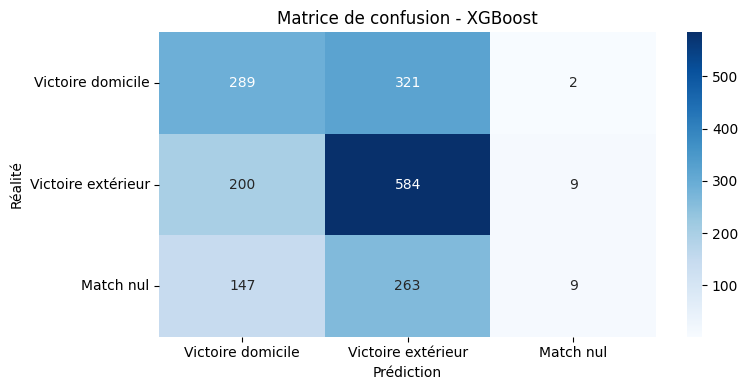

In [77]:
# on crée des étiquettes pour la identifier la variable cible (0,1,2)
class_labels = ['Victoire domicile', 'Victoire extérieur', 'Match nul']                 

# on calcule les différentes métriques de pexgbormance à partir des variables cibles calculées et des données de test
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)            
class_report_xgb = classification_report(y_test, y_pred_xgb, target_names=class_labels)
cm = confusion_matrix(y_test, y_pred_xgb)

print(f"Exactitude du modèle XGBoost: {accuracy_xgb:.4f}")

print("\nRapport de classification:")
print(class_report_xgb)

# on crée un heatmap pour visualiser la matrice de confusion créée plus haut en associant aux valeurs x et y les étiquettes identifiées
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.title('Matrice de confusion - XGBoost')
plt.xlabel('Prédiction')
plt.ylabel('Réalité')
plt.tight_layout()
plt.show()

Afin de savoir quelles variables explicatives ont le plus d'importance pour le model on peut utiliser la fonction `feature_importances_`

Importance des variables explicatives - XGBoost:
                                Importance
ExterieurCode                     0.074067
DomicileCode                      0.062841
AnneeSaison                       0.038359
DiffButsExterieur                 0.035088
DiffButs                          0.035051
DiffButsGlobal                    0.034621
ExterieurAvgButsEncaisses_Away    0.034273
DomicileAvgButsEncaisses_Home     0.034171
ExterieurAvgButsMarques_Away      0.034107
FAF_DiffGlobal                    0.034003
DomicileAvgButsEncaisses_Away     0.033908
ExterieurAvgButsMarques_Home      0.033686
DiffButsDomicile                  0.033620
FAF_Nul_Domicile_Ext              0.033517
DomicileAvgButsMarques_Away       0.033324
DomicileAvgButsMarques_Home       0.033225
SemaineSaison                     0.032689
ExterieurAvgButsEncaisses_Home    0.032624
ExterieurForme                    0.032622
FAF_VictoiresDomicile_Ext         0.032081
FAF_Nul_Domicile_Dom              0.031896
FAF_D

<Figure size 1800x1000 with 0 Axes>

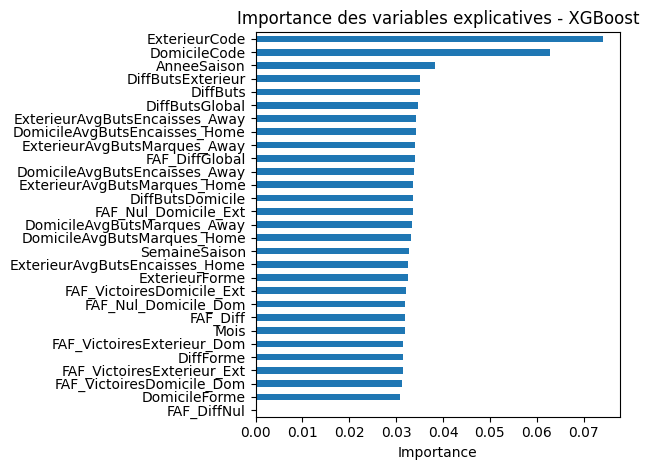

In [78]:
feature_importance = pd.DataFrame({
    'Importance': best_xgb.feature_importances_
}, index=features).sort_values('Importance', ascending=False)

feature_importance == [['ExterieurCode', 'DomicileCode']]
print("Importance des variables explicatives - XGBoost:")
print(feature_importance)

plt.figure(figsize=(18, 10))
feature_importance.plot(kind='barh', legend=False)
plt.gca().invert_yaxis()  
plt.xlabel('Importance')
plt.title('Importance des variables explicatives - XGBoost')
plt.tight_layout()
plt.show()

#### Interprétation

Après avoir analysé les résultats de notre modèle de prédiction XGBoost, nous sommes plutôt satisfaits de ce que nous avons obtenu pour notre projet.

Notre modèle atteint une précision globale (accuracy) de 0,48, ce qui est près de 16% supérieur au hasard (qui serait de 0,33). Nous avons donc pu atteindre notre objectif du projet! On peut donc affirmer que notre algorithme est capable de prédire correctement l'issue d'un match dans environ 48% des cas.

En regardant la matrice de confusion, on remarque que notre modèle est significativement meilleur pour prédire les victoires à domicile et à l'extérieur que pour prédire les matchs nuls. C'est une problématique relativement récurrente en analytique du sport, les matchs nuls étant difficile à prévoir en général au point que plusieurs sites de pari choisissent de ne simplement pas parier sur les matchs nuls vù leur nature imprédictible très liée au hasard.

Ce qui est particulièrement intéressant, c'est l'importance des variables explicatives. Sans surprise, les codes d'équipe (DomicileCode et ExterieurCode) sont les facteurs les plus déterminants, ce qui confirme que la qualité intrinsèque des équipes joue un rôle majeur dans l'issue des matchs. L'AnneeSaison est également importante, probablement parce que la forme des équipes évolue d'une saison à l'autre ainsi que la variable sample_weights que nous avons fait passer au modèle pour accorder plus d'importance au matchs récents.

Les statistiques de buts (marqués et encaissés) semblent également jouer un rôle important, ce qui est logique puisqu'elles reflètent directement la performance offensive et défensive des équipes.

En revanche, la forme récente des équipes (DomicileForme et ExterieurForme) semble avoir moins d'impact que ce qu'on aurait pu penser.

Pour la suite du projet, on pourrait essayer d'améliorer encore la performance du modèle en travaillant sur des variables explicatives plus spécifiques ou en testant d'autres algorithmes. Par exemple, un réseau de neuronnes nous permettrait potentiellement de mieux capturer les différences entre les matchs et ainsi mieux prédire les matchs nuls et victoires extérieures pour sur lesquelles le modèle a présentement davantage de difficulté à bien performer

#### Apprentissages sur la création du modèle prédictif

La création du modèle prédictif a été une expérience très enrichissante qui nous a permis d'approfondir notre compréhension des algorithmes d'apprentissage automatique.

Nous avons d'abord appris à diviser correctement les données en ensembles d'entraînement et de test. Pour des données temporelles comme celles-ci, il était crucial de respecter l'ordre chronologique plutôt que de faire un échantillonnage aléatoire. Cela simule mieux la façon dont le modèle sera utilisé en pratique.
Nous avons également découvert l'importance de l'optimisation des hyperparamètres. L'utilisation de `RandomizedSearchCV` nous a permis d'explorer efficacement l'espace des hyperparamètres. Nous avons ainsi compris que:
- Il est préférable de tester plusieurs combinaisons plutôt que de se fier à l'intuition
- Des métriques appropriées doivent être choisies pour l'évaluation (balanced_accuracy, recall, f1)
- La validation croisée stratifiée aide à maintenir la distribution des classes

Un apprentissage crucial a été l'importance de contrer le déséquilibre des classes. Dans le cas de notre modèle, il y avait plus de matchs représentant une victoire à domicile (46.01%) que de matchs deprésentant une victoire à l'extérieur (28.85%) ou de matchs nuls (25.14%). Nous avons appris à utiliser des techniques comme:
- L'attribution de poids aux échantillons basés sur leur ancienneté (les matchs récents comptant plus)
- L'utilisation de paramètres comme class_weight: 'balanced'

Nous avons aussi appris à évaluer correctement un modèle en utilisant:
- La matrice de confusion pour visualiser les types d'erreurs
- Les métriques de rappel et de précision par classe
- L'analyse de l'importance des caractéristiques pour comprendre quelles variables influençaient le plus la prédiction

## Utiliser le modèle pour prédire des matchs futurs

Comme dernière étape, l'objectif est maintenant de rendre notre modèle réellement opérationnel pour les utilisateurs. Nous allons donc devoir non seulement sauvegarder notre modèle entraîné mais également créer une fonction capable de prédire le résultat d'un match futur ayant comme intrant les équipes qui s'affrontent ainsi que la date du match.

### Sauvegarder le modèle

On sauvegarde en premier lieu le modèle entraîné précédemment avec la librairie `pickle` et la méthode `.dump`

In [79]:
import pickle

#### **Ne pas exécuter la cellule ci-dessous**, elle sauvegarde le modèle

In [80]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_xgb, file)

### Créer la fonction de prédiction

La logique derrière la création de la fonction est la suivante : nous allons créer une nouvelle ligne à la fin du *data frame* et y stocker les valeurs du nouveau match à prédire. C'est par la suite cette ligne seule sur laquelle la fonction `best_xgb.predict` sera appellée afin d'obtenir la prédiction selon les équipes 

In [81]:
def predire_matchs(domicile, exterieur, date):

    # on commence par créer une copie du data frame initial afin de ne pas le modifier
    predire_df = matchs.copy()

    # on ajoute les différentes variables explicatives utilisées lors de l'entraînement du modèle
    features = [
    'DomicileCode', 'ExterieurCode', 'DomicileForme', 'ExterieurForme', 
    'DiffForme', 'FAF_VictoiresDomicile_Dom', 'FAF_Diff', 'FAF_DiffGlobal', 
    'FAF_VictoiresExterieur_Dom', 'FAF_VictoiresDomicile_Ext', 
    'FAF_VictoiresExterieur_Ext', 'SemaineSaison', 'Mois', 'AnneeSaison',
    'DomicileAvgButsMarques_Home', 'DomicileAvgButsEncaisses_Home', 
    'DomicileAvgButsMarques_Away', 'DomicileAvgButsEncaisses_Away', 
    'ExterieurAvgButsMarques_Home', 'ExterieurAvgButsEncaisses_Home', 
    'ExterieurAvgButsMarques_Away', 'ExterieurAvgButsEncaisses_Away', 
    'DiffButsDomicile', 'DiffButsExterieur', 'DiffButs', 'DiffButsGlobal',
    'FAF_Nul_Domicile_Dom', 'FAF_Nul_Domicile_Ext', 'FAF_DiffNul' 
]
    
    # on veut maintenant créer une nouvelle ligne dans le data frame comportant les informations du match à prédire
    # on itére d'abord à travers chaque colonne de features pour vérifier si la colonne et au sein du data frame predire_df
    # si elle l'est, on ajoute cette colonne au dictionnaire vide new_row en associant une valeur de 0
    new_row = {}
    for col in features:
        if col in predire_df.columns:
            new_row[col] = 0.0
    
    # afin de combler cette nouvelle ligne nous devons ajouter les variables de date et d'équipes en premier lieu afin que le reste puissent être calculées par nos fonctions par la suite
    # on commence par transformer la date saisie en format datetime et on la store dans la variable date
    date = pd.to_datetime(date)
    # on associe la valeur de la date dans la colonne date au sein du dictionnaire new_row
    new_row['Date'] = date
    # on utilise la méthode get pour obtenir le code des deux équipes à l'aide du dictionnaire créé précédemment
    new_row['DomicileCode'] = code_equipe.get(domicile)
    new_row['ExterieurCode'] = code_equipe.get(exterieur)
    # on ajoute la colonne mois en extrayant le mois de la colonne 
    new_row['Mois'] = (date.month)
    # on vient maintenant ajouter l'année de la saison et on la soustrait de 1 dans le cas où les on se situe entre Janvier et Juillet (pour qu'un match du 1er janvier 2025 soit considéré comme dans l'année 2024 par exemple)  
    if date > pd.Timestamp(date.year, month=8, day=5):
        new_row['AnneeSaison'] = int(date.year - 1)
    else:
        new_row['AnneeSaison'] = int(date.year)
    # on ajoute maintenant la semaine de la saison en effectuant le même calcul qui a été réalisé plus tôt
    new_row['SemaineSaison'] = int(((pd.Timestamp(date) - pd.Timestamp(year=int(new_row['AnneeSaison']), month=8, day=5)).days // 7) + 1)
    
    # on peut maintenant ajouter la nouvelle ligne constituant le match à prédire à la fin du data frame en précisant .loc[len(predire_df)] pour ce faire
    matchs.loc[len(predire_df)] = new_row

    # on applique maintenant les fonctions créées plus tôt pour calculer la forme d'équipe, les statistiques de but et les résultats face-à-face
    stats_df = stats_equipe(predire_df)
    predire_df = faf_equipes(stats_df)
    # on conserve maintenant uniquement les variables explicatives spécifiées plus tôt pour la dernière ligne (le match à prédire) et on les stocke dans la variable X_pred
    X_pred = predire_df.iloc[-1:][features]

    # on prédit maintenant le résultat en utilisant notre modèle best_xgb et la fonction .predict sur les variables explicatives X_pred
    # on peut utiliser la fonction .predict_proba pour avoir la confiance du modèle en sa prédiction
    y_pred = best_xgb.predict(X_pred)
    y_pred_prob = best_xgb.predict_proba(X_pred)
    # dans le cas où la prédiction est de 0, on prédit une victoire de l'équipe extérieur
    if y_pred == 0:
        prediction = print(f"Le modèle prédit une victoire de {exterieur} à {y_pred_prob[0, 0]:.0%}!")
    # dans le cas où la prédiction est de 1, on prédit une victoire de l'équipe domicile
    elif y_pred==1:
        prediction = print(f"Le modèle prédit une victoire de {domicile} à {y_pred_prob[0, 1]:.0%}!")
    else:
        prediction = print(f"Le modèle prédit un match nul à {y_pred_prob[0, 2]:.0%}!")
    # on retourne la prédiction résultante
    return prediction

On peut maintenant utiliser la fonction et l'ensemble de notre modèle en spéficiant les équipes qui s'affrontent et la date du match

La cellule ci-dessous prendra quelques temps à exécuter, **au maximum $50$ secondes**. 

In [82]:
predire_matchs('Arsenal', 'Liverpool', '2025-04-25')

Le modèle prédit une victoire de Liverpool à 42%!


#### Apprentissages sur l'utilisation du modèle pour prédire les matchs futurs

L'application pratique du modèle pour prédire les résultats de matchs futurs a été la partie la plus gratifiante du projet puisqu'elle permettait de lier tout ce qui avait été faite avant et de pouvoir répondre à la question au coeur de notre projet.
Nous avons pu créer une fonction (predire_matchs) qui:
- Accepte des entrées simples (équipe à domicile, équipe à l'extérieur, date du match)
- Génère automatiquement toutes les features nécessaires en se basant sur l'historique
- Applique les mêmes transformations que celles utilisées pendant l'entraînement
- Présente les résultats de manière compréhensible

Nous avons aussi réalisé qu'un modèle n'est vraiment utile que s'il peut être facilement utilisé et ains appris à:
- Sauvegarder le modèle entraîné pour une utilisation future
- Créer des interfaces simples pour utiliser le modèle sans connaître ses détails techniques
- Générer des prédictions interprétables

# Apprentissages global

